# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Saarthak92/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


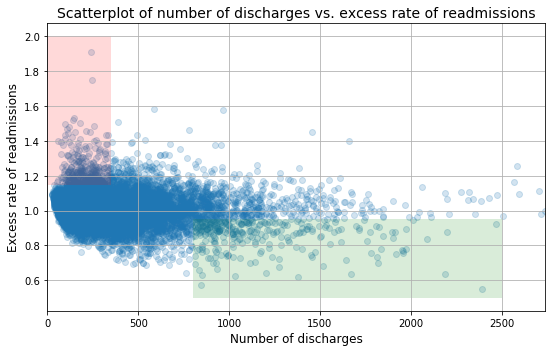

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

We start the analysis by analyzing the data against the report which uses only a sample
of the data.

PART A :-

A. Initial Analysis:
1. Overall, rate of readmissions is trending down with increasing number of discharges?
2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

The scatter plot doesn't easily lend itself to determining if there is a decreasing trend. 
We should probably do a regression analysis to find such a trend.



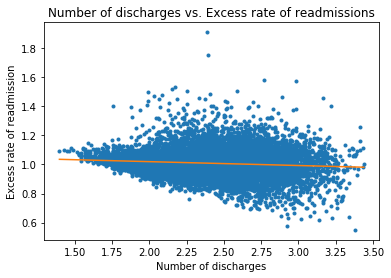

Slope for the linear regression line :  -0.0266267410642
The Pearson correlation coefficient: -0.09631131091312788
The p-value of a two-tailed test: 4.251689233406735e-25


In [11]:
a = np.array(np.log10(x)) # Considering rate of increase in number of discharges for a more normal distribution.
b = np.array(y)
slope, intercept = np.polyfit(a,b,1)
x_theor = np.array([min(np.log10(x)), max(np.log10(x))])
y_theor = slope * x_theor + intercept
_ = plt.plot(a,b,marker=".",linestyle="none")
_ = plt.plot(x_theor,y_theor)
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmission')
plt.title('Number of discharges vs. Excess rate of readmissions')
plt.show()
print("Slope for the linear regression line : ", slope)

# Testing the validity of this observation:
import scipy.stats as stats
corr = stats.pearsonr(np.log10(x),y)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))



Thus, we observe a negative linear relationship between the excess rate of readmission and increase in discharges.
However, the correlation coefficient is close to zero, indicating that the relationship is very weak.
Thus, we can conclude that there is no significant trend in the data.

B. Statistics

- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess     readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [6]:
df = clean_hospital_read_df

print("shape: " + str(df.shape))
# see fields and their content

# check on zero values for discharges that could impact the mean
print("lowest number of discharges: %.f" % df['Number of Discharges'].min())
df[df['Number of Discharges'] == 0]

df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions'], inplace=True)
print("Removing the null values also removed the zero-value discharges, the new lowest number of discharges is %.f." % df['Number of Discharges'].min())

# The impact seems small with  81 (of 11578; +/- 0.700%) rows being removed. 
# Removing the null values also removed the zero-value discharges, the new lowest number of discharges is 25.

# filter datasets
df_100 = df[df['Number of Discharges'] < 100]
df_1000 = df[df['Number of Discharges'] > 1000]

# proportion of hospitals/facilities with certain number sized of discharges
n = len(df['Number of Discharges'])
discharges_100 = float(len(df_100))
discharges_1000 = float(len(df_1000))
discharges_inbetween = n - discharges_100

print("%5s %18s %10s" % ('measurement', 'value', 'frequency'))
print(42 * "-")
print("%5s %11.0f %8.2f%%" % ('discharges <  100', discharges_100, discharges_100/n*100)) 
print("%5s %8.0f %7.2f%%" % ('discharges in between', discharges_inbetween, discharges_inbetween/n*100)) 
print("%5s %10.0f %8.2f%%" % ('discharges <1,000', discharges_1000, discharges_1000/n*100)) 
print("%5s %13.0f %5.0f%%" % ('total discharges', n, 100)) 
print(42 * "-")
print(42 * " ")

#test findings < 100
mean = df_100['Excess Readmission Ratio'].mean()
perc = float(len(df[(df['Number of Discharges'] <100) & (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) / discharges_100

print("Findings for Discharges <100")
print(42 * "-")
print("%5s %11.3f" % ('mean', mean)) 
print("%5s %11.2f%%" % ('perc', perc*100)) 
print(42 * "-")
print(42 * " ")

#test findings > 1000
mean = df_1000['Excess Readmission Ratio'].mean()
perc = float(len(df[(df['Number of Discharges'] >1000) & (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) / discharges_1000

print("Findings for Discharges >1000")
print(42 * "-")
print("%5s %11.3f" % ('mean', mean)) 
print("%5s %11.2f%%" % ('perc', perc*100)) 
print(42 * "-")

shape: (11578, 12)
lowest number of discharges: 0
Removing the null values also removed the zero-value discharges, the new lowest number of discharges is 25.
measurement              value  frequency
------------------------------------------
discharges <  100        1188    10.33%
discharges in between    10309   89.67%
discharges <1,000        463     4.03%
total discharges         11497   100%
------------------------------------------
                                          
Findings for Discharges <100
------------------------------------------
 mean       1.023
 perc       63.22%
------------------------------------------
                                          
Findings for Discharges >1000
------------------------------------------
 mean       0.978
 perc       44.49%
------------------------------------------


We observe that the statistical claims appear to be true.

C. Conclusions:

1. There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
2. Smaller hospitals/facilities may be lacking necessary resources to ensure quality care 
   and prevent complications that lead to readmissions.



In [7]:
df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


So the claim that "There is a significant correlation between hospital 
capacity (number of discharges) and readmission rates" does not hold.

D. Regulatory policy recommendations:
    
1. Hospitals/facilties with small capacity (< 300) should be required to demonstrate
   upgraded resource allocation for quality care to continue operation.
2. Directives and incentives should be provided for consolidation of hospitals and facilities
   to have a smaller number of them with higher capacity and number of discharges.



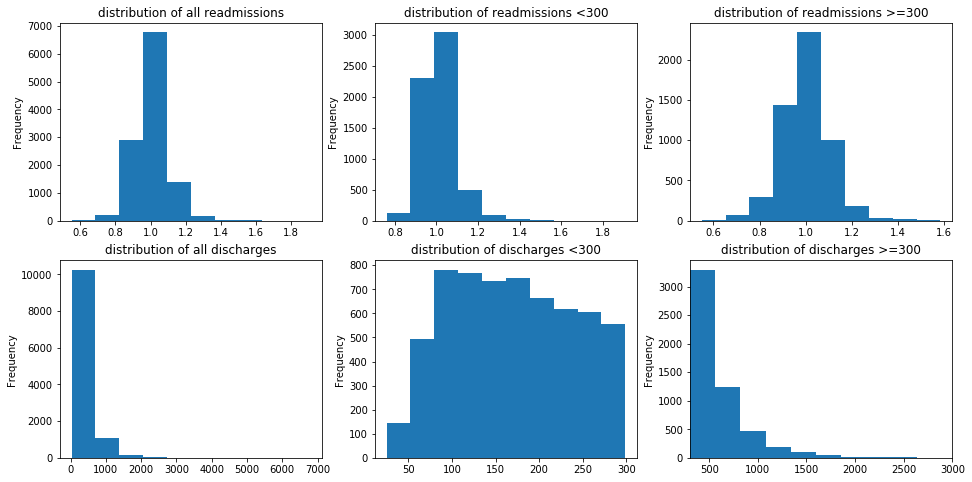

In [8]:
# Getting a better sense of the distribution of readmissions and discharges
plt.subplots(figsize=(16,8))
# all
plt.subplot(2, 3, 1)
df['Excess Readmission Ratio'].plot(kind='hist', title='distribution of all readmissions')
plt.subplot(2, 3, 4)
df['Number of Discharges'].plot(kind='hist', title='distribution of all discharges')

# filter datasets
df_l300 = df[df['Number of Discharges'] < 300]
df_g300 = df[(df['Number of Discharges'] >= 300)]

# <300
plt.subplot(2, 3, 2)
df_l300['Excess Readmission Ratio'].plot(kind='hist', title='distribution of readmissions <300')
plt.subplot(2, 3, 5)
df_l300['Number of Discharges'].plot(kind='hist', title='distribution of discharges <300')

# >=300
plt.subplot(2, 3, 3)
df_g300['Excess Readmission Ratio'].plot(kind='hist', title='distribution of readmissions >=300')
plt.subplot(2, 3, 6)
# the limit leed to cutting off three records on the right tail but brings the distribution into focus
df_g300['Number of Discharges'].plot(kind='hist', bins=25, title='distribution of discharges >=300').set_xlim([300, 3000]);



The distribution of readmissions for hospitals with discharges less than 300 seems quite similar to those 
with 300 or more discharges. As such, the conclusion about larger hospitals leading to better outcomes seems weak.

Analyzing the first recommendation with a hypothesis test:

In [20]:
STATEMENT:
Null Hypothesis: There is no difference in the proportion of excess readmission in hospital facilities with discharges
                 less than 300 (l300) and hospitals with 300 or more discharges (g300)
        
Alternative Hypothesis: There is a difference in proportion of readmission rate.
 
EQUATION:
        H_o: p_l300 = p_g300
        H_a: p_l300 > p_g300

Splitting data based on threshold

In [9]:
discharges_l300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<300]
discharges_g300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>=300]

Predicting the probability of readmission rate > 1 in each group

In [10]:
p_g300 = len(discharges_g300[discharges_g300['Excess Readmission Ratio']>1])/len(discharges_g300)
p_l300 = len(discharges_l300[discharges_l300['Excess Readmission Ratio']>1])/len(discharges_l300)
print("Probability of excess readmission when number of discharges >=300 {}".format(p_g300))
print("Probability of excess readmission when number of discharges <300 {}".format(p_l300))

Probability of excess readmission when number of discharges >=300 0.4928558174058267
Probability of excess readmission when number of discharges <300 0.5374918140144074


Next, we verify whether we meet the requirements for normal distribution approximation ie

np >= 10

n(1-p) >= 10

In [12]:
print(len(discharges_l300)*p_l300)
print(len(discharges_l300)*(1-p_l300))
print(len(discharges_g300)*p_g300)
print(len(discharges_g300)*(1-p_g300))

3283.0000000000005
2824.9999999999995
2656.0
2733.0000000000005


Calculating p-value:

In [40]:
from statsmodels.stats.proportion import proportions_ztest as pz

above = len(discharges_g300[discharges_g300['Excess Readmission Ratio']>1])
below = len(discharges_l300[discharges_l300['Excess Readmission Ratio']>1])

zstat,pvalue = pz([above,below],[len(discharges_g300),len(discharges_l300)],value=0,alternative="larger")

print("The p-value corresponding to the proportions test is: {}".format(pvalue))

The p-value corresponding to the proportions test is: 0.9999991205096471


Thus, we cannot reject the null hypothesis. We conclude that the proportion of excessive readmission is the same 
across both groups. The observed 

array([[   1.0914,   25.    ],
       [   1.0961,   27.    ],
       [   1.0934,   28.    ],
       ..., 
       [   0.8128,  299.    ],
       [   1.1225,  299.    ],
       [   1.0708,  299.    ]])